In [1]:
'''
Set of weekdays, 𝐻: {𝑖|𝑖=1,…,5}
Set of weekend, 𝑆: {𝑖|𝑖=6,7}
𝑛 number of days in a schedule, (𝑛=1,…,7)
𝑝 number of staffs in a schedule, (𝑝=1,…,50)
𝑖 index of days, 𝑖=1,2,…,𝑛
𝑗 index of staff, 𝑗=1,2,…,𝑝
𝑘 index of departments, 𝑘=1,…,5
'''

'\nSet of weekdays, 𝐻: {𝑖|𝑖=1,…,5}\nSet of weekend, 𝑆: {𝑖|𝑖=6,7}\n𝑛 number of days in a schedule, (𝑛=1,…,7)\n𝑝 number of staffs in a schedule, (𝑝=1,…,50)\n𝑖 index of days, 𝑖=1,2,…,𝑛\n𝑗 index of staff, 𝑗=1,2,…,𝑝\n𝑘 index of departments, 𝑘=1,…,5\n'

In [2]:
#!pip install cplex
#!pip install docplex

In [3]:
from docplex.mp.model import Model

m = Model(name='Paper')

In [4]:
H = [1,2,3,4,5] #weekdays

S = [6,7] #weekends

n = 7 #days of the week

p = 50 #number of employees
 
M = 5 #the maximum number of departments a person can be assigned to in a single shift.

K = [1, 2, 3, 4, 5] #departments

I = [1,2,3,4,5,6,7] #All days

J = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
     21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]

a = [4,20,8,12,15] # 𝑎𝒌 weight of department k, 𝑘=1,…,5

w1 = 0.7 # 𝑤1 weight of first objective function
w2 = 0.3 # 𝑤2 weight of second objective function

In [5]:
# 𝑟 𝑖,𝑗: 0 𝑖𝑓 𝑠𝑡𝑎𝑓𝑓 j 𝑝𝑟𝑒𝑓𝑓𝑒𝑟𝑒𝑑 𝑑𝑎𝑦 𝑖 𝑎𝑠 𝑎 𝑑𝑎𝑦−𝑜𝑓𝑓 1 𝑜.𝑤. (for i in H)

import random
import numpy as np

# Function to get weekday name from index
def get_weekday_name(index):
    weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
    return weekdays[index]

# Initialize the matrix
r = np.ones((5, 50))

# Populate the matrix
for j in range(50):
    zeros_to_place = random.randint(0, 2)
    i_values = list(range(5))
    random.shuffle(i_values)
    for i in i_values[:zeros_to_place]:
        r[i][j] = 0


for i in range(5):
    print("{:<10}".format(get_weekday_name(i)), end="")
    for j in range(20):
        print("{:<2}".format(int(r[i][j])), end="")
    print()


Monday    1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 
Tuesday   1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 
Wednesday 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 
Thursday  1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 
Friday    0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 


In [6]:
'''
Decision variables:
𝑥𝑑 𝑖,𝑗={1,𝑖𝑓 𝑠𝑡𝑎𝑓𝑓 𝑗 𝑖𝑠 𝑎𝑠𝑠𝑖𝑔𝑛𝑒𝑑 𝑡𝑜 𝑑𝑎𝑦 𝑠ℎ𝑖𝑓𝑡 𝑎𝑡 𝑑𝑎𝑦 𝑖 0,𝑜.𝑤.

𝑥𝑚 𝑖,𝑗= {1,𝑖𝑓 𝑠𝑡𝑎𝑓𝑓 𝑗 𝑖𝑠 𝑎𝑠𝑠𝑖𝑔𝑛𝑒𝑑 𝑡𝑜 𝑚𝑜𝑟𝑛𝑖𝑛𝑔 𝑠ℎ𝑖𝑓𝑡 𝑎𝑡 𝑑𝑎𝑦 𝑖 0,𝑜.𝑤.

𝑥𝑟 𝑖,𝑗= {1,𝑖𝑓 𝑠𝑡𝑎𝑓𝑓 𝑗 𝑖𝑠 𝑜𝑓𝑓 𝑎𝑡 𝑑𝑎𝑦 𝑖 0,𝑜.𝑤.

𝑦𝑑 𝑖,𝑗,𝑘= {1,𝑖𝑓 𝑠𝑡𝑎𝑓𝑓 𝑗 𝑖𝑠 𝑎𝑠𝑠𝑖𝑔𝑛𝑒𝑑 𝑡𝑜 𝑘.𝑑𝑒𝑝𝑎𝑟𝑡𝑚𝑒𝑛𝑡 𝑖𝑛 𝑑𝑎𝑦 𝑠ℎ𝑖𝑓𝑡 𝑎𝑡 𝑑𝑎𝑦 𝑖 0, 𝑜.𝑤.

𝑦𝑚 𝑖,𝑗,𝑘= {1,𝑖𝑓 𝑠𝑡𝑎𝑓𝑓 𝑗 𝑖𝑠 𝑎𝑠𝑠𝑖𝑔𝑛𝑒𝑑 𝑡𝑜 𝑘.𝑑𝑒𝑝𝑎𝑟𝑡𝑚𝑒𝑛𝑡 𝑖𝑛 𝑚𝑜𝑟𝑛𝑖𝑛𝑔 𝑠ℎ𝑖𝑓𝑡 𝑎𝑡 𝑑𝑎𝑦 𝑖 0, 𝑜.𝑤.

𝑡𝑗: 𝑚𝑎𝑥𝑖𝑚𝑢𝑚 𝑡𝑜𝑡𝑎𝑙 𝑤𝑜𝑟𝑘𝑙𝑜𝑎𝑑 𝑎𝑚𝑜𝑢𝑛𝑡 𝑜𝑓 𝑠𝑡𝑎𝑓𝑓 𝑗

𝑞𝑗:𝑚𝑎𝑥𝑖𝑚𝑢𝑚 𝑡𝑜𝑡𝑎𝑙 𝑛𝑢𝑚𝑏𝑒𝑟 𝑜𝑓 𝑢𝑛𝑤𝑎𝑛𝑡𝑒𝑑 𝑑𝑎𝑦−𝑜𝑓𝑓 𝑎𝑠𝑠𝑖𝑔𝑛𝑚𝑒𝑛𝑡𝑠 𝑜𝑓 𝑠𝑡𝑎𝑓𝑓 𝑗
    '''

'\nDecision variables:\n𝑥𝑑 𝑖,𝑗={1,𝑖𝑓 𝑠𝑡𝑎𝑓𝑓 𝑗 𝑖𝑠 𝑎𝑠𝑠𝑖𝑔𝑛𝑒𝑑 𝑡𝑜 𝑑𝑎𝑦 𝑠ℎ𝑖𝑓𝑡 𝑎𝑡 𝑑𝑎𝑦 𝑖 0,𝑜.𝑤.\n\n𝑥𝑚 𝑖,𝑗= {1,𝑖𝑓 𝑠𝑡𝑎𝑓𝑓 𝑗 𝑖𝑠 𝑎𝑠𝑠𝑖𝑔𝑛𝑒𝑑 𝑡𝑜 𝑚𝑜𝑟𝑛𝑖𝑛𝑔 𝑠ℎ𝑖𝑓𝑡 𝑎𝑡 𝑑𝑎𝑦 𝑖 0,𝑜.𝑤.\n\n𝑥𝑟 𝑖,𝑗= {1,𝑖𝑓 𝑠𝑡𝑎𝑓𝑓 𝑗 𝑖𝑠 𝑜𝑓𝑓 𝑎𝑡 𝑑𝑎𝑦 𝑖 0,𝑜.𝑤.\n\n𝑦𝑑 𝑖,𝑗,𝑘= {1,𝑖𝑓 𝑠𝑡𝑎𝑓𝑓 𝑗 𝑖𝑠 𝑎𝑠𝑠𝑖𝑔𝑛𝑒𝑑 𝑡𝑜 𝑘.𝑑𝑒𝑝𝑎𝑟𝑡𝑚𝑒𝑛𝑡 𝑖𝑛 𝑑𝑎𝑦 𝑠ℎ𝑖𝑓𝑡 𝑎𝑡 𝑑𝑎𝑦 𝑖 0, 𝑜.𝑤.\n\n𝑦𝑚 𝑖,𝑗,𝑘= {1,𝑖𝑓 𝑠𝑡𝑎𝑓𝑓 𝑗 𝑖𝑠 𝑎𝑠𝑠𝑖𝑔𝑛𝑒𝑑 𝑡𝑜 𝑘.𝑑𝑒𝑝𝑎𝑟𝑡𝑚𝑒𝑛𝑡 𝑖𝑛 𝑚𝑜𝑟𝑛𝑖𝑛𝑔 𝑠ℎ𝑖𝑓𝑡 𝑎𝑡 𝑑𝑎𝑦 𝑖 0, 𝑜.𝑤.\n\n𝑡𝑗: 𝑚𝑎𝑥𝑖𝑚𝑢𝑚 𝑡𝑜𝑡𝑎𝑙 𝑤𝑜𝑟𝑘𝑙𝑜𝑎𝑑 𝑎𝑚𝑜𝑢𝑛𝑡 𝑜𝑓 𝑠𝑡𝑎𝑓𝑓 𝑗\n\n𝑞𝑗:𝑚𝑎𝑥𝑖𝑚𝑢𝑚 𝑡𝑜𝑡𝑎𝑙 𝑛𝑢𝑚𝑏𝑒𝑟 𝑜𝑓 𝑢𝑛𝑤𝑎𝑛𝑡𝑒𝑑 𝑑𝑎𝑦−𝑜𝑓𝑓 𝑎𝑠𝑠𝑖𝑔𝑛𝑚𝑒𝑛𝑡𝑠 𝑜𝑓 𝑠𝑡𝑎𝑓𝑓 𝑗\n    '

In [7]:
# 2D matrix [day i][staff j] day shift
xd = [[m.binary_var(name="xd_{0}_{1}".format(i, j)) for j in J] for i in I]

# 2D matrix [day i][staff j] morning shift
xm = [[m.binary_var(name="xm_{0}_{1}".format(i, j)) for j in J] for i in I]

# 2D matrix [day i][staff j] off day
xr = [[m.binary_var(name="xr_{0}_{1}".format(i, j)) for j in J] for i in I]

# 3D matrix [day i][staff j][department k] day shift
yd = [[[m.binary_var(name="yd_{0}_{1}_{2}".format(i, j, k)) for k in K] for j in J] for i in I]

# 3D matrix [day i][staff j][department k] morning shift
ym = [[[m.binary_var(name="ym_{0}_{1}_{2}".format(i, j, k)) for k in K] for j in J] for i in I]


# 1D array [staff j] 𝑚𝑎𝑥𝑖𝑚𝑢𝑚 𝑡𝑜𝑡𝑎𝑙 𝑤𝑜𝑟𝑘𝑙𝑜𝑎𝑑 𝑎𝑚𝑜𝑢𝑛𝑡 𝑜𝑓 𝑠𝑡𝑎𝑓𝑓 𝑗
t = [m.integer_var(name="t_{0}".format(j)) for j in J]

# 1D array [staff j] 𝑚𝑎𝑥𝑖𝑚𝑢𝑚 𝑡𝑜𝑡𝑎𝑙 𝑛𝑢𝑚𝑏𝑒𝑟 𝑜𝑓 𝑢𝑛𝑤𝑎𝑛𝑡𝑒𝑑 𝑑𝑎𝑦_𝑜𝑓𝑓 𝑎𝑠𝑠𝑖𝑔𝑛𝑚𝑒𝑛𝑡𝑠 𝑜𝑓 𝑠𝑡𝑎𝑓𝑓 𝑗
q = [m.integer_var(name="q_{0}".format(j)) for j in J]

In [8]:
'''Constraints'''

for i in range(len(H)): # H: weekdays
    for j in range(len(J)):
        m.add_constraint(m.sum(xd[i][j] + xm[i][j] + xr[i][j]) == 1) # a person will be off on a weekday; if he is not off so either work in the morning or afternoon shift.

for i in range(len(S)): #S: weekend
    for j in range(len(J)):
        m.add_constraint(m.sum(xd[i][j] + xm[i][j]) == 1) # a person to work either in the morning or in the afternoon shift at the weekend.

for j in range(len(J)):
  m.add_constraint(m.sum(xr[i][j] for i in range(len(H))) == 1) # each person is allowed to use only one day-off per week.

for k in range(len(K)):
    for i in range(len(I)):
      m.add_constraint(m.sum(yd[i][j][k] for j in range(len(J))) >= 1) # in the day shift, at least one person is assigned to each department.

for k in range(len(K)):
    for i in range(len(I)):
      m.add_constraint(m.sum(ym[i][j][k] for j in range(len(J))) >= 1) # in the morning shift, at least one person is assigned to each department.

# constraints (7), (8), (9) and (10) the assignment of up to 5 departments in the morning and day shifts per person in per day is protected
# by 𝑥𝑑 𝑖,𝑗,  𝑦𝑑 𝑖𝑗𝑘 𝑎𝑛𝑑 𝑥𝑚 𝑖,𝑗,  𝑦𝑚 𝑖𝑗𝑘 decision variables.

for i in range(len(I)):
  for j in range(len(J)):
    m.add_constraint(xd[i][j] <= m.sum(yd[i][j][k] for k in range(len(K))))

for i in range(len(I)):
  for j in range(len(J)):
    m.add_constraint(xm[i][j] <= m.sum(ym[i][j][k] for k in range(len(K))))

for i in range(len(I)):
  for j in range(len(J)):
    m.add_constraint(m.sum(yd[i][j][k] for k in range(len(K))) <= M * xd[i][j])

for i in range(len(I)):
  for j in range(len(J)):
    m.add_constraint(m.sum(ym[i][j][k] for k in range(len(K))) <= M * xm[i][j])


# the constraint that required to provide a balanced workload. The maximum workload per person is 𝑡𝑗.

for j in range(len(J)):
  m.add_constraint(m.sum(m.sum(a[k] * (yd[i][j][k] + ym[i][j][k]) for k in range(len(K))) for i in range(len(I))) <= t[j])


# The constraint enforces that each staff member is assigned to one shift on their unwanted days-off.
# minimizing the total 𝑞𝑗, the assignments to unwanted days-off are minimized.

for j in range(len(J)):
  m.add_constraint(m.sum((xd[i][j] + xm[i][j]) * r[i][j] for i in range(len(H))) <= q[j])

In [9]:
m.minimize(w1 * (m.sum(t[j] for j in range(len(J))))/780 + w2 * (m.sum(q[j] for j in range(len(J))))/50)

In [10]:
m.export_as_lp("Paper.lp")

m.solve()

docplex.mp.solution.SolveSolution(obj=2.22774,values={xd_1_5:1,xd_1_9:1,..

In [11]:
# Print the results or perform further analysis
print("Objective Value", m.objective_value)

Objective Value 2.2277435897435898


In [12]:
# Print the values of decision variables t
print("Values of t:")
for var in m.iter_variables():
    if var.name.startswith('t'):
        print(f"{var.to_string()}: {var.solution_value}")

# Print the values of decision variables q
print("Values of q:")
for var in m.iter_variables():
    if var.name.startswith('q'):
        print(f"{var.to_string()}: {var.solution_value}")

Values of t:
t_1: 16.0
t_2: 27.0
t_3: 16.0
t_4: 16.0
t_5: 32.0
t_6: 32.0
t_7: 32.0
t_8: 16.0
t_9: 16.0
t_10: 31.0
t_11: 20.0
t_12: 35.0
t_13: 16.0
t_14: 32.0
t_15: 27.0
t_16: 24.0
t_17: 27.0
t_18: 32.0
t_19: 16.0
t_20: 28.0
t_21: 16.0
t_22: 40.0
t_23: 20.0
t_24: 32.0
t_25: 47.0
t_26: 20.0
t_27: 27.0
t_28: 16.0
t_29: 16.0
t_30: 16.0
t_31: 35.0
t_32: 36.0
t_33: 16.0
t_34: 24.0
t_35: 20.0
t_36: 16.0
t_37: 32.0
t_38: 27.0
t_39: 16.0
t_40: 32.0
t_41: 16.0
t_42: 16.0
t_43: 27.0
t_44: 16.0
t_45: 24.0
t_46: 16.0
t_47: 32.0
t_48: 16.0
t_49: 76.0
t_50: 192.0
Values of q:
q_1: 3.0
q_2: 3.0
q_3: 4.0
q_4: 3.0
q_5: 4.0
q_6: 3.0
q_7: 2.0
q_8: 2.0
q_9: 2.0
q_10: 3.0
q_11: 4.0
q_12: 3.0
q_13: 4.0
q_14: 4.0
q_15: 4.0
q_16: 4.0
q_17: 3.0
q_18: 3.0
q_19: 2.0
q_20: 3.0
q_21: 2.0
q_22: 2.0
q_23: 3.0
q_24: 4.0
q_25: 2.0
q_26: 3.0
q_27: 2.0
q_28: 3.0
q_29: 4.0
q_30: 4.0
q_31: 4.0
q_32: 4.0
q_33: 3.0
q_34: 3.0
q_35: 4.0
q_36: 4.0
q_37: 3.0
q_38: 4.0
q_39: 2.0
q_40: 3.0
q_41: 4.0
q_42: 4.0
q_43: 4.0
q_44: 2.0
q

In [13]:
#!pip install pareto

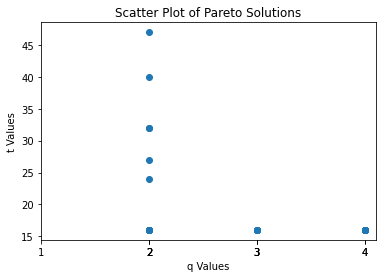

In [14]:
import matplotlib.pyplot as plt

# Extract the values of decision variables t and q
values_t = [var.solution_value for var in m.iter_variables() if var.name.startswith('t')]
values_q = [var.solution_value for var in m.iter_variables() if var.name.startswith('q')]

# Combine t and q values into a list of tuples
combined_values = list(zip(values_q, values_t))

# Identify Pareto solutions
pareto_solutions = []
for i, (q1, t1) in enumerate(combined_values):
    is_pareto = all(
        not (q2 < q1 and t2 < t1) for q2, t2 in combined_values[:i] + combined_values[i + 1:]
    )
    if is_pareto:
        pareto_solutions.append((q1, t1))

# Unzip the filtered solutions back into separate lists
pareto_values_q, pareto_values_t = zip(*pareto_solutions)

# Create a scatter plot for Pareto solutions
plt.scatter(pareto_values_q, pareto_values_t)
plt.xlabel('q Values')
plt.ylabel('t Values')
plt.title('Scatter Plot of Pareto Solutions')

# Set integer x-axis labels
plt.xticks(list(map(int, plt.xticks()[0])))
plt.show()